In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
data = pd.read_csv(r'乳腺癌原始数据.csv')
data.head(100)

,BIRADS等级,年龄age,肿块形状form,肿块边缘edge,肿块密度density,严重度diease
0,1,69,4,5,2,1
1,1,72,4,3,2,1
2,1,71,4,4,2,1
3,1,58,4,4,2,0
4,1,45,2,4,2,0
...,...,...,...,...,...,...
95,4,45,3,1,2,1
96,4,64,2,4,2,1
97,4,76,4,3,2,1
98,4,67,2,4,2,1


In [13]:
data.shape

(830, 6)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   BIRADS等级     830 non-null    int64
 1   年龄age        830 non-null    int64
 2   肿块形状form     830 non-null    int64
 3   肿块边缘edge     830 non-null    int64
 4   肿块密度density  830 non-null    int64
 5   严重度diease    830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


In [15]:
data.describe()

,BIRADS等级,年龄age,肿块形状form,肿块边缘edge,肿块密度density,严重度diease
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.328916,55.781928,2.781928,2.813253,2.084337,0.485542
std,0.633985,14.671782,1.242361,1.567175,0.350936,0.500092
min,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,2.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,2.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,2.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # 用于特征标准化、独热编码和数值编码
from sklearn.model_selection import train_test_split # 用于将数据集划分为训练集和测试集
x = data.drop(['严重度diease'], axis=1)  # 特征数据
y = data['严重度diease']  # 标签数据
x


,BIRADS等级,年龄age,肿块形状form,肿块边缘edge,肿块密度density
0,1,69,4,5,2
1,1,72,4,3,2
2,1,71,4,4,2
3,1,58,4,4,2
4,1,45,2,4,2
...,...,...,...,...,...
825,5,57,2,4,2
826,5,47,4,5,2
827,5,54,4,3,2
828,5,41,2,1,2


In [17]:
y

0      1
1      1
2      1
3      0
4      0
      ..
825    0
826    0
827    0
828    0
829    0
Name: 严重度diease, Length: 830, dtype: int64

In [18]:
y.value_counts()


严重度diease
0    427
1    403
Name: count, dtype: int64

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# 假设 x 是您的特征数据 DataFrame
# 例如：x = pd.DataFrame(...)

# 定义离散特征的名称
discrete_features = ["BIRADS等级", "肿块形状form", "肿块边缘edge", "肿块密度density"]

# 初始化标签编码器
label_encoders = {}

# 对每个离散特征进行标签编码
for feature in discrete_features:
    le = LabelEncoder()
    x[feature] = le.fit_transform(x[feature])
    label_encoders[feature] = le  # 保存编码器以便将来使用
# 初始化归一化器
    scaler = MinMaxScaler()
    
    # 对 "年龄" 列进行归一化
    x["年龄age"] = scaler.fit_transform(x[["年龄age"]])

# 打印标签编码后的完整特征矩阵
print("标签编码后的完整特征矩阵：")
print(x)

标签编码后的完整特征矩阵：
     BIRADS等级     年龄age  肿块形状form  肿块边缘edge  肿块密度density
0           0  0.653846         3         4            1
1           0  0.692308         3         2            1
2           0  0.679487         3         3            1
3           0  0.512821         3         3            1
4           0  0.346154         1         3            1
..        ...       ...       ...       ...          ...
825         4  0.500000         1         3            1
826         4  0.371795         3         4            1
827         4  0.461538         3         2            1
828         4  0.294872         1         0            1
829         4  0.576923         0         0            1

[830 rows x 5 columns]


In [20]:
# 使用 train_test_split 函数按照 8:2 的比例划分数据集
# test_size=0.2 表示 20%的数据用作测试集，即验证集。
# random_state 是一个随机数种子，确保每次划分的结果相同，便于复现结果。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 从训练集中划分验证集（占总体样本的10%）
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)

# 输出各数据集的大小（可选）
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (581, 5)
x_val shape: (83, 5)
x_test shape: (166, 5)


In [21]:
# 打印处理后的数据集信息
x_train.info()
# X_test.info()
x_test.info
x_val.info

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 193 to 478
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BIRADS等级     581 non-null    int64  
 1   年龄age        581 non-null    float64
 2   肿块形状form     581 non-null    int64  
 3   肿块边缘edge     581 non-null    int64  
 4   肿块密度density  581 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 27.2 KB


<bound method DataFrame.info of      BIRADS等级     年龄age  肿块形状form  肿块边缘edge  肿块密度density
50          3  0.641026         0         0            1
321         3  0.538462         3         2            1
112         3  0.397436         3         3            1
572         4  0.500000         3         3            2
325         3  0.487179         1         0            1
..        ...       ...       ...       ...          ...
782         4  0.294872         3         3            1
364         3  0.294872         1         0            1
122         3  0.435897         3         3            1
283         3  0.179487         0         0            1
721         4  0.474359         3         2            1

[83 rows x 5 columns]>

# 开始建模

## 朴素贝叶斯

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score

# 创建一个管道，包括特征缩放和朴素贝叶斯分类器
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

# 定义参数网格
param_grid = {
    'scaler': [StandardScaler(), None],  # 尝试是否进行特征缩放
    'gnb__priors': [None, [0.5, 0.5]]    # 先验概率（如果有类别不平衡，可以设置先验）
}

# 使用GridSearchCV进行参数搜索
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 输出最佳参数
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_

# 预测测试集的概率
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# 计算AUC值
auc_value = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc_value)

# 预测测试集的类别
y_pred = best_model.predict(x_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'gnb__priors': None, 'scaler': StandardScaler()}
AUC:  0.9155900711278849
Accuracy:  0.8433734939759037


In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

# LightGBM
print("LightGBM:")
lgb_model = lgb.LGBMClassifier()
param_grid_lgb = {'num_leaves': [31, 63], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}
grid_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=3, scoring='roc_auc')
grid_lgb.fit(x_train, y_train)
print("Best parameters found: ", grid_lgb.best_params_)
y_pred_lgb = grid_lgb.predict_proba(x_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_lgb))
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

LightGBM:
[LightGBM] [Info] Number of positive: 185, number of negative: 202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 387, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478036 -> initscore=-0.087912
[LightGBM] [Info] Start training from score -0.087912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [24]:
# XGBoost
import xgboost as xgb
print("XGBoost:")
xgb_model = xgb.XGBClassifier()
param_grid_xgb = {'max_depth': [3, 6], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='roc_auc')
grid_xgb.fit(x_train, y_train)
print("Best parameters found: ", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict_proba(x_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_xgb))
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

XGBoost:
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
AUC:  0.9091304978951952
Accuracy:  0.8433734939759037


In [25]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
print("Random Forest:")
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc')
grid_rf.fit(x_train, y_train)
print("Best parameters found: ", grid_rf.best_params_)
y_pred_rf = grid_rf.predict_proba(x_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_rf))
# 预测测试集的类别
y_pred = best_model.predict(x_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Random Forest:
Best parameters found:  {'max_depth': 10, 'n_estimators': 200}
AUC:  0.8851066918275512
Accuracy:  0.8433734939759037


In [26]:
# SVM，这个算法解释性很差，而且速度很慢，所以不推荐使用
from sklearn.svm import SVC  # 导入支持向量分类器
from sklearn.svm import SVR  # 导入支持向量回归器
print("SVM:")
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='roc_auc')
grid_svm.fit(x_train, y_train)
print("Best parameters found: ", grid_svm.best_params_)
y_pred_svm = grid_svm.predict_proba(x_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_svm))
# 预测测试集的类别
y_pred = best_model.predict(x_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

SVM:
Best parameters found:  {'C': 1, 'kernel': 'rbf'}
AUC:  0.9147191174335898
Accuracy:  0.8433734939759037


Best parameters found:  {'C': 1.623776739188721, 'penalty': 'l2'}
AUC:  0.9116707795035563
Accuracy:  0.8554216867469879
Accuracy:  0.8554216867469879
Confusion Matrix:
 [[72 11]
 [13 70]]
Best threshold: 0.49, Best accuracy: 0.8614457831325302
Confusion Matrix with best threshold:
 [[72 11]
 [12 71]]


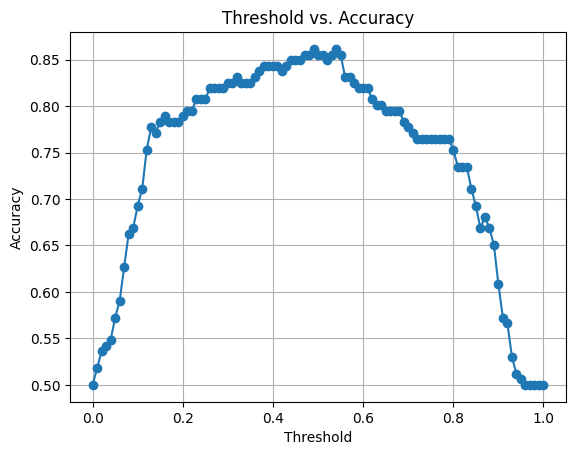

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# 训练逻辑回归模型
# 初始化逻辑回归模型
logistic_model = LogisticRegression(max_iter=1000)  # 增加迭代次数以确保收敛

# 定义参数网格
param_grid = {
    'C': np.logspace(-4, 4, 20),  # 逻辑回归的正则化参数
    'penalty': ['l1', 'l2']      # 正则化类型
}

# 使用GridSearchCV进行参数搜索
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=make_scorer(roc_auc_score))
grid_search.fit(x_train, y_train)

# 输出最佳参数
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_

# 预测测试集
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# 计算AUC值
auc_value = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc_value)
# 预测测试集的类别
y_pred = best_model.predict(x_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# 预测测试集的类别（使用默认阈值0.5）
y_pred = best_model.predict(x_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# 打印混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


# 调整阈值并重新计算性能指标
thresholds = np.linspace(0, 1, 101)  # 生成101个阈值
accuracies = []

for thresh in thresholds:
    y_pred_adj = (y_pred_proba >= thresh).astype(int)
    accuracy_adj = accuracy_score(y_test, y_pred_adj)
    accuracies.append(accuracy_adj)

best_accuracy = max(accuracies)
best_threshold = thresholds[accuracies.index(best_accuracy)]

# 打印最佳阈值和对应的准确率
print(f"Best threshold: {best_threshold}, Best accuracy: {best_accuracy}")

# 使用最佳阈值重新计算混淆矩阵
y_pred_best = (y_pred_proba >= best_threshold).astype(int)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix with best threshold:\n", conf_matrix_best)

# 绘制阈值-准确率曲线
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs. Accuracy')
plt.grid(True)
plt.show()

Using 581 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy:  0.8554216867469879


  0%|          | 0/166 [00:00<?, ?it/s]

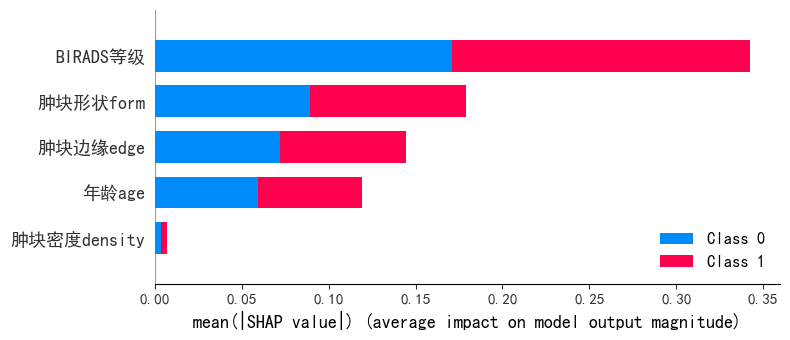

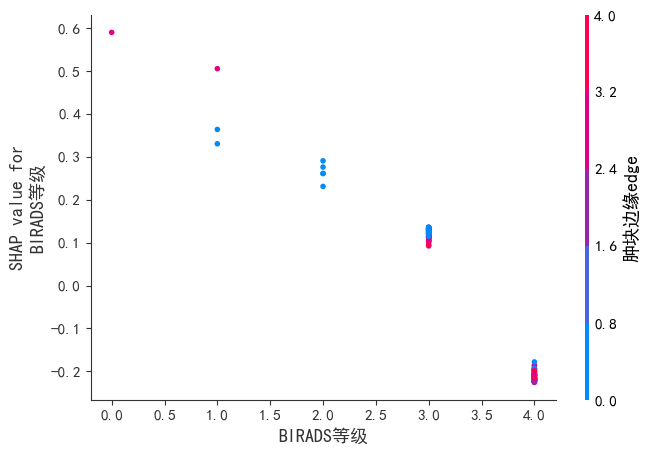

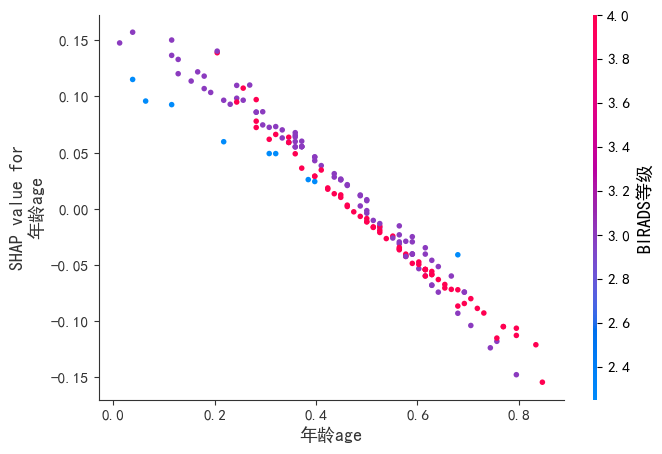

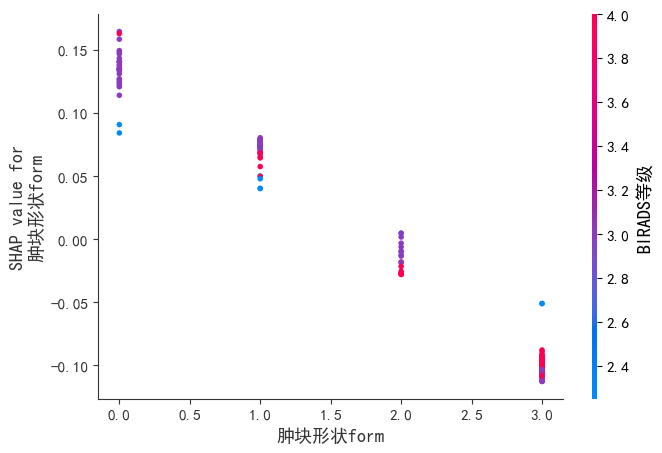

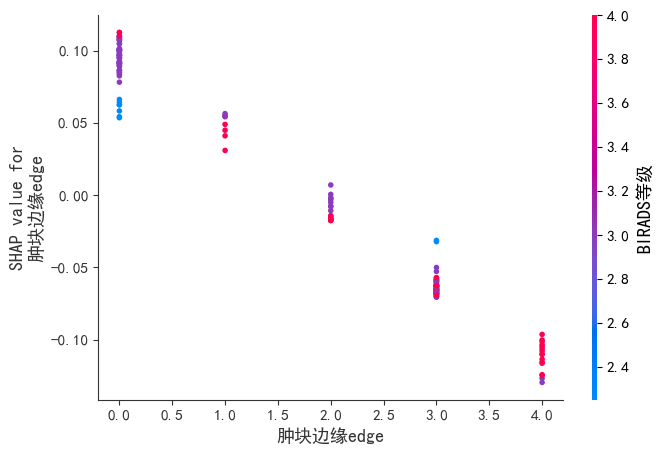

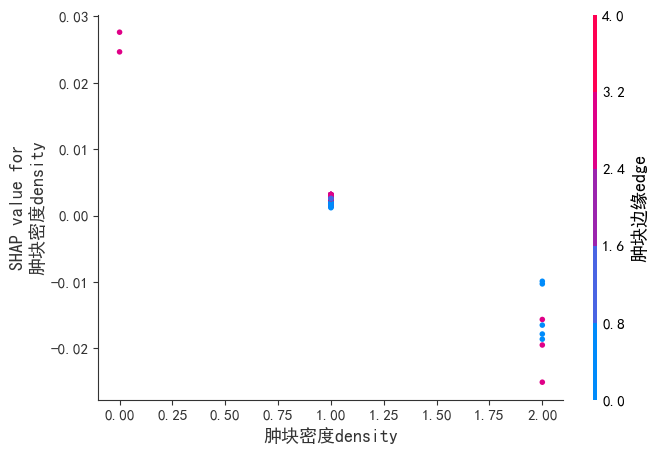

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 使用最佳参数初始化逻辑回归模型
model = LogisticRegression(C=1.623776739188721, penalty='l2', solver='lbfgs')

# 训练模型
model.fit(x_train, y_train)

# 预测测试集的类别
y_pred = model.predict(x_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# 创建一个解释器对象
explainer = shap.KernelExplainer(model.predict_proba, x_train)

# 计算测试集的SHAP值
shap_values = explainer.shap_values(x_test)

# 绘制SHAP值总结图
shap.summary_plot(shap_values, x_test)
# 绘制特征的SHAP依赖图
for feature_name in x_test.columns:
    shap.dependence_plot(feature_name, shap_values[0], x_test)


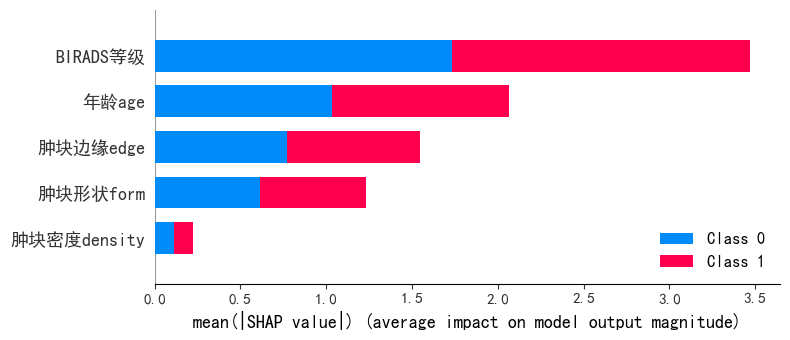

In [ ]:
shap.summary_plot(shap_values, x_train)

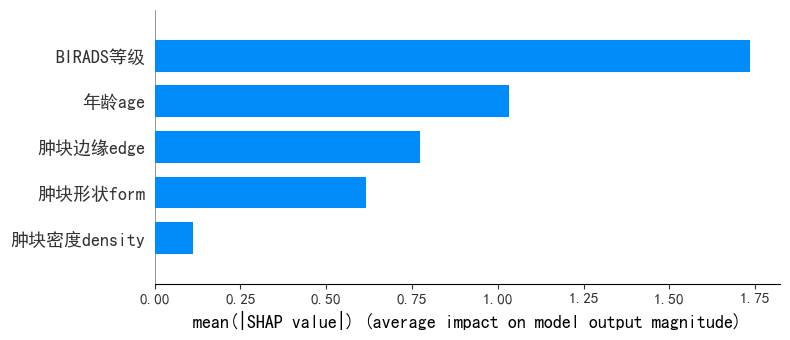

In [ ]:
# SHAP 汇总图设置为条形图，可以显示特征重要性
shap.summary_plot(shap_values[1], x_train, plot_type="bar")

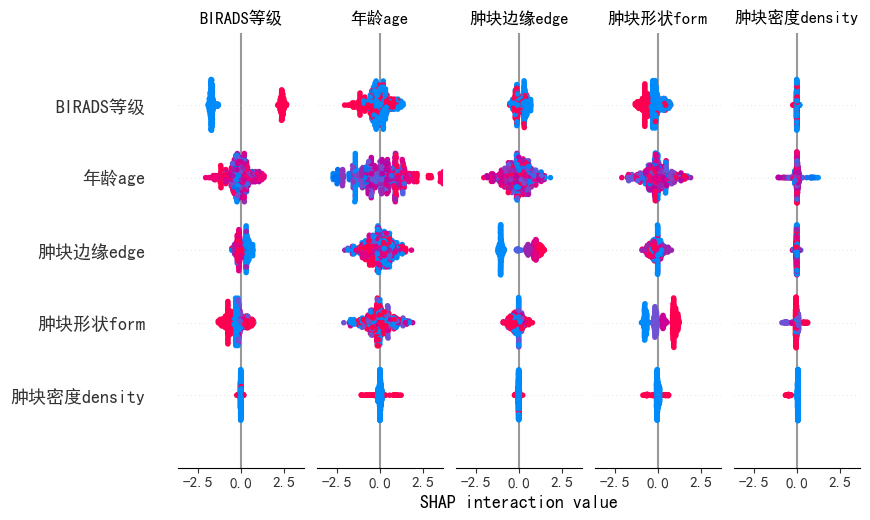

In [ ]:
# 绘制交互效应热力图，这个要计算很久
shap_interaction_values = explainer.shap_interaction_values(x_train)
# shap的交互是比较复杂的协同关系，并不是简单的相乘
# 可视化交互效应，max_display这个参数可以控制显示的特征数量，这个特征的顺序是重要度顺序
shap.summary_plot(shap_interaction_values, x_train, max_display=17)

# 如果分布在0附近，说明这个特征交互对模型的影响不大
# 如果分布在两端，说明这个特征交互对模型的影响很大
# 这个要运行很久


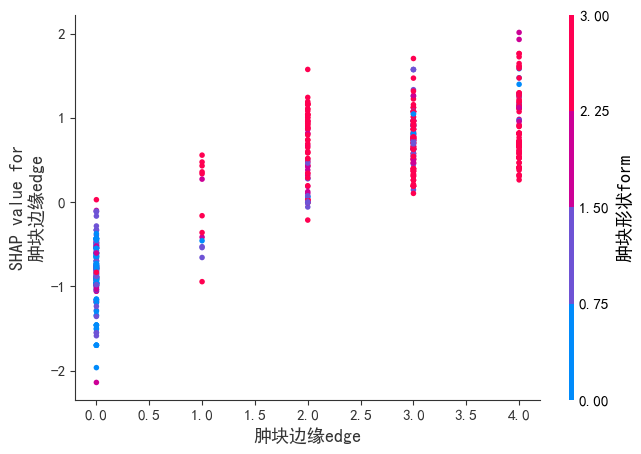

In [ ]:
# 同样的交互效应，也要在意数据的分布来优化可视化的图形
shap.dependence_plot('肿块边缘edge', shap_values[1], x_train, interaction_index="肿块形状form")
# shap.dependence_plot('Tax Liens', shap_values[1], X_train, interaction_index="Annual Income")

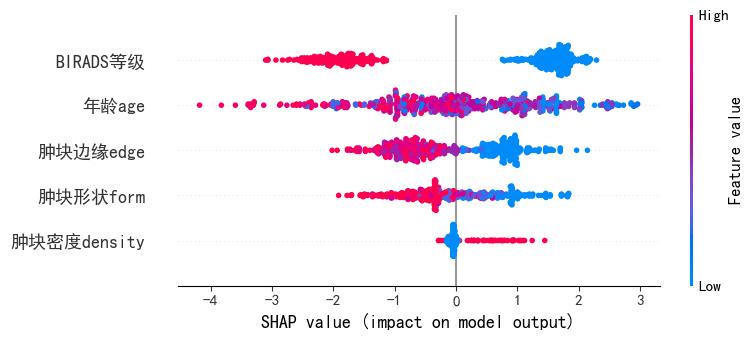

In [ ]:
# SHAP 汇总图默认设置为点图，可以反应特征的重要性和影响方向
shap.summary_plot(shap_values[0], x_train,plot_type="dot", max_display=15)

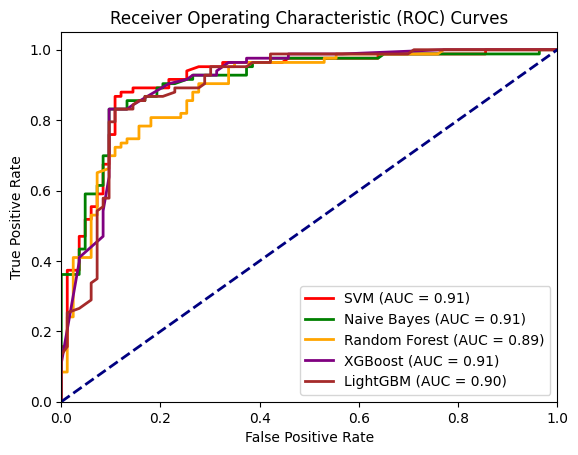

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 假设你已经有了以下模型的预测结果
# y_test 是测试集的真实标签
# y_pred_lr, y_pred_svm, y_pred_nb, y_pred_rf, y_pred_xgb, y_pred_lgb 是各个模型的预测概率

# 计算每个模型的 ROC 曲线和 AUC 值


fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_proba, tpr_proba, _ = roc_curve(y_test, y_pred_proba)
roc_auc_proba = auc(fpr_proba, tpr_proba)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# 绘制所有模型的 ROC 曲线
plt.figure()

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_proba, tpr_proba, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_proba)
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_lgb, tpr_lgb, color='brown', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lgb)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# 配置差，不跑

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# 假设你已经有了训练集和测试集
# x_train, x_test, y_train, y_test

# 定义LightGBM参数网格
# param_grid = {
#     'boosting_type': ['gbdt', 'dart'],  # 提升类型
#     'objective': ['binary'],  # 目标函数，因为是二分类问题，所以是binary
#     'metric': ['binary_logloss'],  # 评估指标
#     'num_leaves': [31, 32, 33],  # 叶子数
#     'learning_rate': [0.01, 0.05, 0.1],  # 学习率
#     'n_estimators': [100, 150, 200],  # 迭代次数
#     'max_depth': [3, 4, 5],  # 最大树深度
#     'min_data_in_leaf': [10, 20, 30],  # 叶子节点最小样本数
#     'bagging_fraction': [0.7, 0.8, 0.9],  # 用于bagging的样本比例
#     'bagging_freq': [5, 10],  # bagging频率
#     'feature_fraction': [0.7, 0.8, 0.9],  # 用于每次迭代的特征比例
#     'reg_alpha': [0.0, 0.1, 0.2],  # L1正则化项
#     'reg_lambda': [0.0, 0.1, 0.2]  # L2正则化项
}

# 初始化LightGBM分类器
# model = lgb.LGBMClassifier(random_state=42)

# 初始化网格搜索对象
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
# grid_search.fit(x_train, y_train)

# 输出最优参数和对应的准确率
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最优参数预测测试集
# y_pred = grid_search.predict(x_test)

# 计算测试集上的准确率
# accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy))

SyntaxError: unmatched '}' (1023365485.py, line 22)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

[LightGBM] [Info] Number of positive: 221, number of negative: 243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476293 -> initscore=-0.094899
[LightGBM] [Info] Start training from score -0.094899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

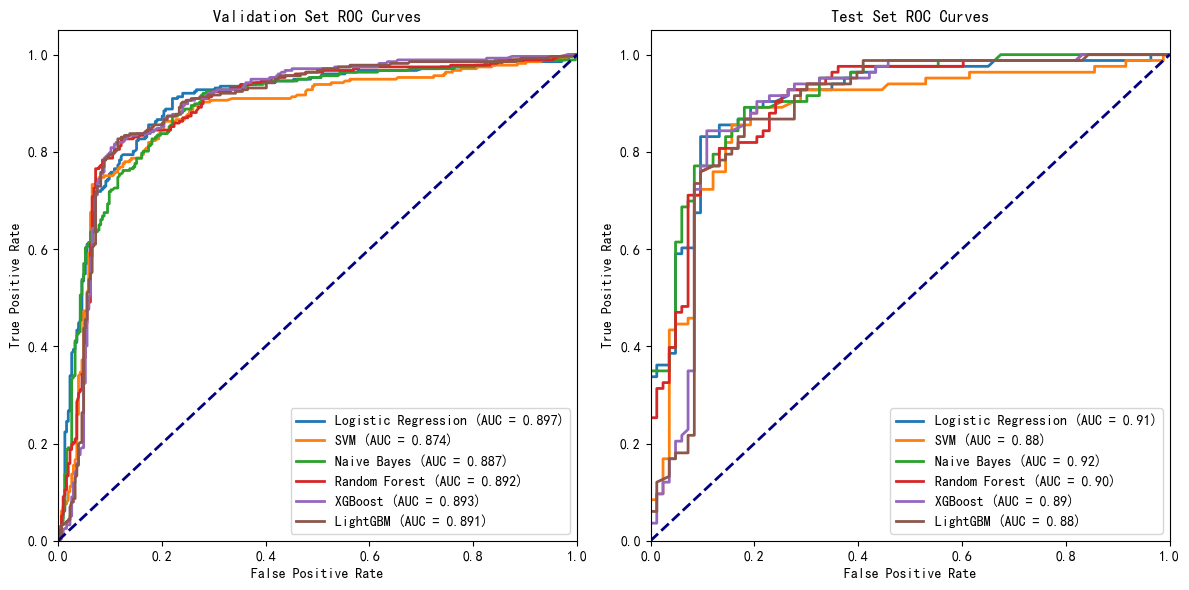

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(C=10, gamma='auto', kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(var_smoothing=1e-5),
    "Random Forest": RandomForestClassifier(
        max_depth=10, max_features='sqrt', min_samples_leaf=1,
        min_samples_split=10, n_estimators=200
    ),
    "XGBoost": xgb.XGBClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=3,
        n_estimators=100, subsample=0.8
    ),
    "LightGBM": lgb.LGBMClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
        n_estimators=100, num_leaves=31, subsample=0.8
    )
}
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 左边图：验证集

for name, model in models.items():
    # 使用交叉验证获取验证集的预测概率
    y_pred_val = cross_val_predict(model, x_train, y_train, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_val)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curves')
plt.legend(loc="lower right")

# 绘制测试集的 ROC 曲线
plt.subplot(1, 2, 2)  # 右边图：测试集

for name, model in models.items():
    # 训练模型并在测试集上进行预测
    model.fit(x_train, y_train)
    y_pred_test = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.394663
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              严重度diease   No. Observations:                  581
Model:                          Logit   Df Residuals:                      575
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Mar 2025   Pseudo R-squ.:                  0.4297
Time:                        22:59:08   Log-Likelihood:                -229.30
converged:                       True   LL-Null:                       -402.09
Covariance Type:            nonrobust   LLR p-value:                 1.563e-72
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.3461      0.933    -10.016      0.000     -11.175      -7.517
BIRADS等级        1.7679    

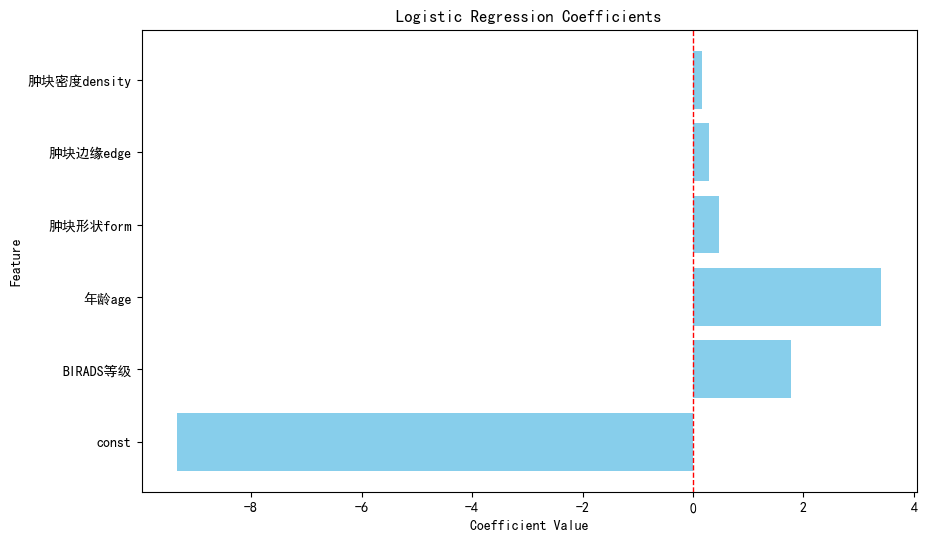

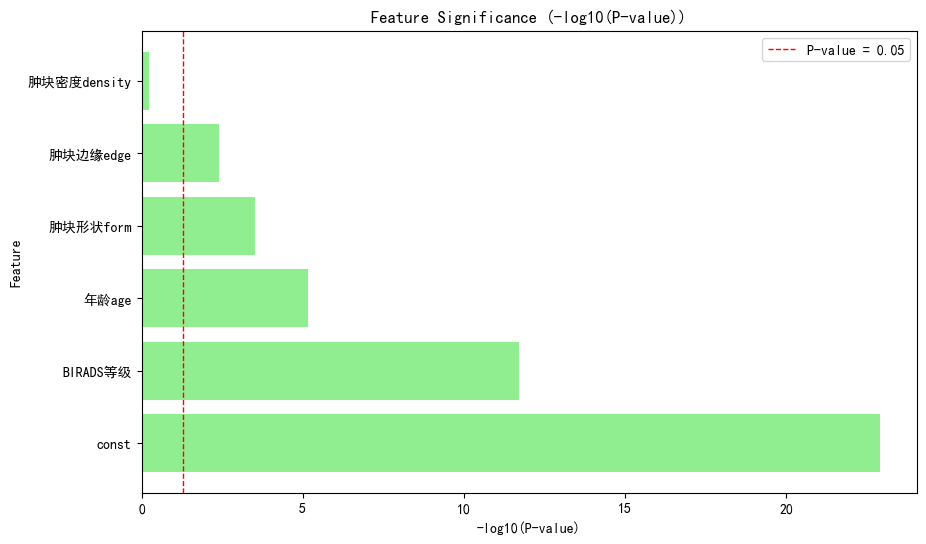

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题



# 添加常数项（截距）
x_train_const = sm.add_constant(x_train)

# 使用 statsmodels 拟合逻辑回归模型
logit_model = sm.Logit(y_train, x_train_const)
result = logit_model.fit()

# 输出模型摘要
print(result.summary())

# 提取系数和 p 值
params = result.params  # 系数
p_values = result.pvalues  # p 值

# 创建一个 DataFrame 来存储系数和 p 值
coef_df = pd.DataFrame({
    'Feature': x_train_const.columns,
    'Coefficient': params,
    'P-value': p_values
})

# 打印系数和 p 值
print(coef_df)

# 绘制显著性图（系数条形图）
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

# 绘制显著性图（p 值条形图）
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], -np.log10(coef_df['P-value']), color='lightgreen')
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', linewidth=1, label='P-value = 0.05')
plt.xlabel('-log10(P-value)')
plt.ylabel('Feature')
plt.title('Feature Significance (-log10(P-value))')
plt.legend()
plt.show()

In [ ]:
# shap解释需要计算shap值，才可以后续可视化
import shap
import lightgbm as lgb

# 使用最佳参数重新训练一个新的 LightGBM 模型
best_params = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 63}
lgb_best = lgb.LGBMClassifier(**best_params)
lgb_best.fit(x_train, y_train)

# 使用 shap 进行解释
# 创建一个 SHAP 解释器，使用训练好的 LightGBM 模型
explainer = shap.Explainer(lgb_best)

# 计算 SHAP 值，使用训练集
shap_values = explainer.shap_values(x_train)

[LightGBM] [Info] Number of positive: 277, number of negative: 304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 581, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476764 -> initscore=-0.093010
[LightGBM] [Info] Start training from score -0.093010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

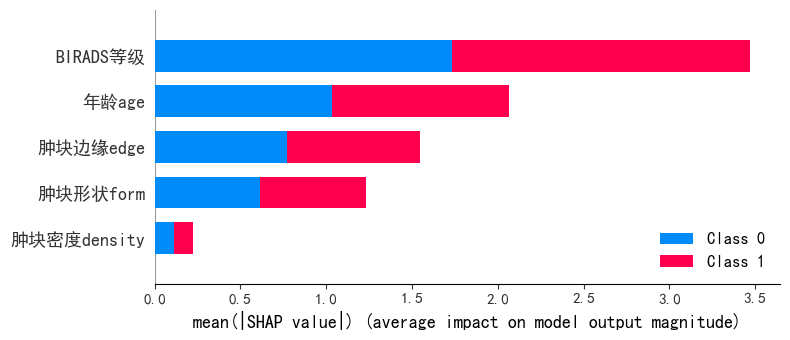

In [ ]:
shap.summary_plot(shap_values, x_train)

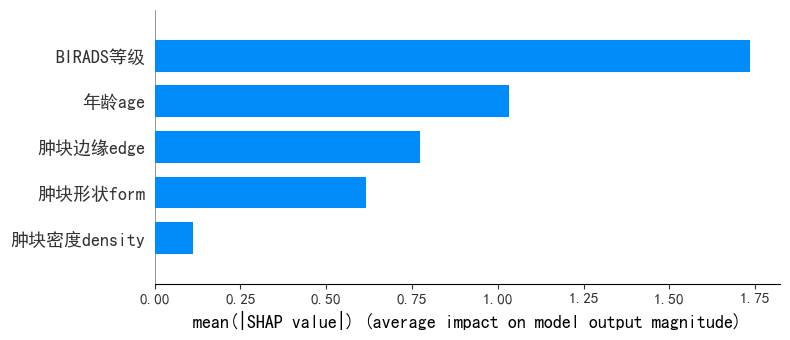

In [ ]:
# SHAP 汇总图设置为条形图，可以显示特征重要性
shap.summary_plot(shap_values[1], x_train, plot_type="bar")

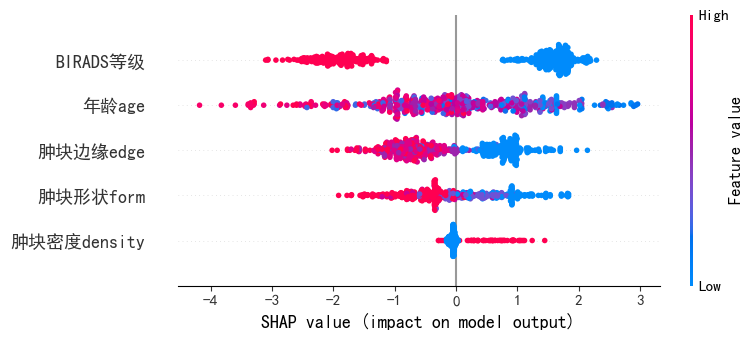

In [ ]:
# SHAP 汇总图默认设置为点图，可以反应特征的重要性和影响方向
shap.summary_plot(shap_values[0], x_train,plot_type="dot", max_display=15)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 608 to 772
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BIRADS等级     166 non-null    int64  
 1   年龄age        166 non-null    float64
 2   肿块形状form     166 non-null    int64  
 3   肿块边缘edge     166 non-null    int64  
 4   肿块密度density  166 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.8 KB


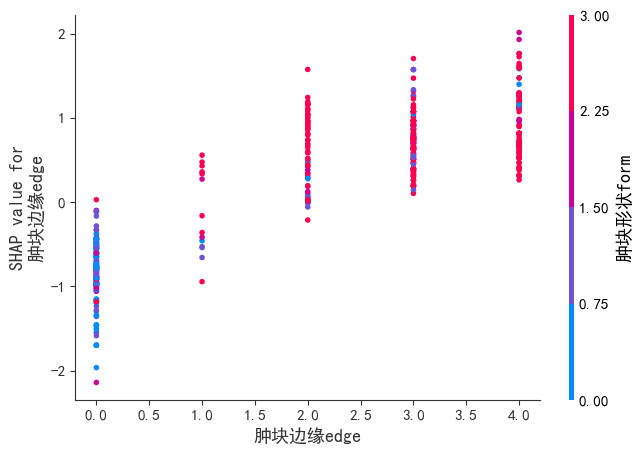

In [ ]:
# 同样的交互效应，也要在意数据的分布来优化可视化的图形
shap.dependence_plot('肿块边缘edge', shap_values[1], x_train, interaction_index="肿块形状form")
# shap.dependence_plot('Tax Liens', shap_values[1], X_train, interaction_index="Annual Income")

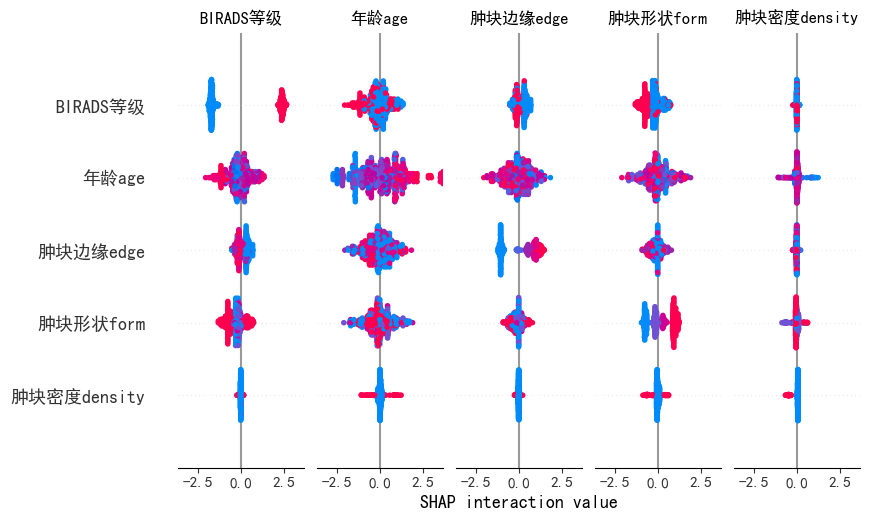

In [ ]:
# 绘制交互效应热力图，这个要计算很久
shap_interaction_values = explainer.shap_interaction_values(x_train)
# shap的交互是比较复杂的协同关系，并不是简单的相乘
# 可视化交互效应，max_display这个参数可以控制显示的特征数量，这个特征的顺序是重要度顺序
shap.summary_plot(shap_interaction_values, x_train, max_display=17)

# 如果分布在0附近，说明这个特征交互对模型的影响不大
# 如果分布在两端，说明这个特征交互对模型的影响很大
# 这个要运行很久


In [ ]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pkg_resources

def generate_requirements_file(file_path="requirements.txt"):
    # 获取当前环境中安装的所有包及其版本号
    installed_packages = pkg_resources.working_set
    dependencies = sorted(["{}=={}".format(pkg.key, pkg.version) for pkg in installed_packages])

    # 将依赖写入文件
    with open(file_path, "w") as f:
        f.write("\n".join(dependencies))

    print(f"requirements.txt 文件已生成并保存到 {file_path}")

if __name__ == "__main__":
    generate_requirements_file()

requirements.txt 文件已生成并保存到 requirements.txt


In [35]:
import joblib
# 导出模型到指定路径
joblib.dump(LogisticRegression, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']